Problem 1

A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected


In [150]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import scipy.stats as stats 
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

3.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [213]:
#3.1 
mu,sigma = 5 , 1.5
p_value = stats.norm.cdf(3.17,5,1.5)
p_value


0.11123243744783456

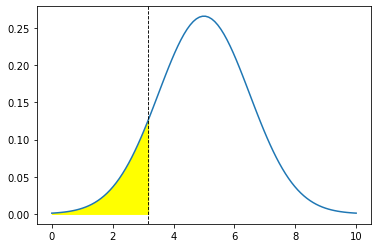

In [36]:
x=np.linspace(0,10,100)
plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.axvline(x=3.17,c='black',linestyle='--',linewidth=0.9)
x1=np.linspace(0,3.17,21)
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color='Yellow')
plt.show()

3.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [214]:
#3.2,
p_value=1-stats.norm.cdf(3.6,5,1.5)
p_value

0.8246760551477705

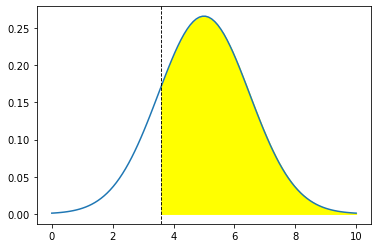

In [153]:
x=np.linspace(0,10,100)
plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.axvline(x=3.6,c='black',linestyle='--',linewidth=0.9)
x1=np.linspace(3.6,10,26)
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color='Yellow')
plt.show()

3.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [215]:
#3.3
p_value=stats.norm.cdf(5.5,5,1.5)-stats.norm.cdf(5,5,1.5)
p_value

0.13055865981823633

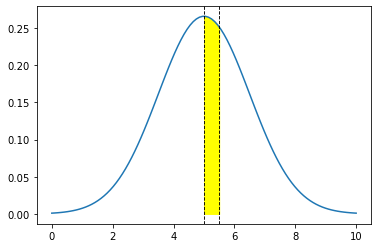

In [216]:
x=np.linspace(0,10,100)
plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.axvline(x=5,c='black',linestyle='--',linewidth=0.9)
plt.axvline(x=5.5,c='black',linestyle='--',linewidth=0.9)
x1=np.linspace(5,5.5,5)
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color='Yellow')
plt.show()

3.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [217]:
#3.4
p_value=stats.norm.cdf(3,5,1.5)+1-stats.norm.cdf(7.5,5,1.5)
p_value

0.13900157199868257

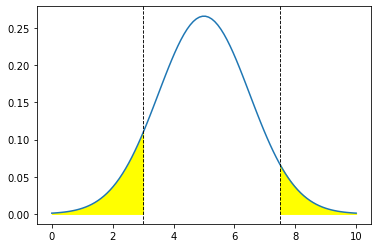

In [226]:
x=np.linspace(0,10,100)
plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.axvline(x=3,c='black',linestyle='--',linewidth=0.9)
plt.axvline(x=7.5,c='black',linestyle='--',linewidth=0.9)
x1=np.linspace(0,3,30)
x2=np.linspace(7.5,10,25)
plt.fill_between(x1, stats.norm.pdf(x1, mu, sigma), color='Yellow')
plt.fill_between(x2, stats.norm.pdf(x2, mu, sigma), color='Yellow')
plt.show()

Grades of the final examination in a training course are found to be normally distributed, with a mean of 77 and a standard deviation of 8.5. Based on the given information answer the questions below.

4.1 What is the probability that a randomly chosen student gets a grade below 85 on this exam?

In [219]:
#4.1
mean, sd = 77 , 8.5
p_value=stats.norm.cdf(85,77,8.5)

p_value

0.8266927837484748

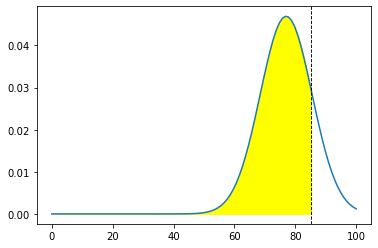

In [220]:
y=np.linspace(0,100,100)
plt.plot(y,stats.norm.pdf(y,mean,sd))
plt.axvline(x=85,c='black',linestyle='--',linewidth=0.9)
y1=np.linspace(0,85,85)
plt.fill_between(y1, stats.norm.pdf(y1, mean, sd), color='Yellow')
plt.show()

4.2 What is the probability that a randomly selected student scores between 65 and 87?

In [221]:
#4.2
p_value = stats.norm.cdf(87,mean,sd)-stats.norm.cdf(65,mean,sd)
p_value

0.8012869336779058

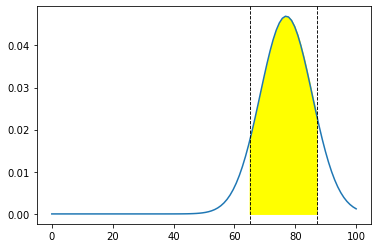

In [161]:
y=np.linspace(0,100,100)
plt.plot(y,stats.norm.pdf(y,mean,sd))
plt.axvline(x=65,c='black',linestyle='--',linewidth=0.9)
plt.axvline(x=87,c='black',linestyle='--',linewidth=0.9)
y1=np.linspace(65,87,22)
plt.fill_between(y1, stats.norm.pdf(y1, mean, sd), color='Yellow')
plt.show()

4.3 What should be the passing cut-off so that 75% of the students clear the exam?

In [222]:
#4.3
score_75 = stats.norm.ppf(0.25,mean,sd)
print('Passing cut-off so that 75% students clear the exam is:', (score_75))

Passing cut-off so that 75% students clear the exam is: 71.2668371233333


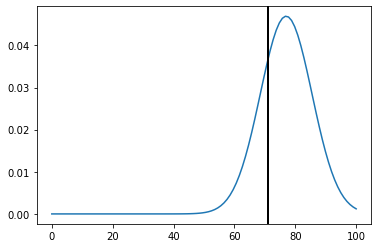

In [223]:
y=np.linspace(0,100,100)
plt.plot(y,stats.norm.pdf(y,mean,sd))
plt.axvline(x=71, c='black',linestyle='-',linewidth=2)
#plt.fill_between(y1, stats.norm.pdf(y1, mean, sd), color='Yellow')
plt.show()

 

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

5.1 Earlier experience of Zingaro with this particular client is favorable as the stone surface was found to be of adequate hardness. However, Zingaro has reason to believe now that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [224]:
#5
Data1=pd.read_csv('C:/Users/anamk/Downloads/Zingaro_Company.csv')


In [165]:
Data1.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [166]:
x=Data1['Unpolished ']

In [167]:
#5.1
t_statistic, pr_value = ttest_1samp(x,150)

In [168]:
pr_value

8.342573994839285e-05

5.2 Is the mean hardness of the polished and unpolished stones the same?

In [169]:
#5.2  
t_statistic, pr_value = ttest_ind(df1['Unpolished '],df1['Treated and Polished'])
pr_value


0.001465515019462831

In [170]:
print ("The two-sample t-test p-value is:", pr_value)

alpha_level = 0.05

if pr_value < alpha_level:
    print('We reject null hypothesis')
    print('The mean hardness of stones in both polished and unpolished are not same.')
else:
    print('We fail to reject null hypothesis')
    print('The mean hardness of stones in both polished and unpolished are same')

The two-sample t-test p-value is: 0.001465515019462831
We reject null hypothesis
The mean hardness of stones in both polished and unpolished are not same.



Aquarius health club, one of the largest and most popular cross-fit gyms in the country has been advertising a rigorous program for body conditioning. The program is considered successful if the candidate is able to do more than 5 push-ups, as compared to when he/she enrolled in the program. Using the sample data provided can you conclude whether the program is successful? (Consider the level of Significance as 5%)

Note that this is a problem of the paired-t-test. Since the claim is that the training will make a difference of more than 5, the null and alternative hypotheses must be formed accordingly.

In [172]:
#6
Data2=pd.read_csv('C:/Users/anamk/Downloads/Aquarius_gym.csv')
Data2.head()

,Sr no.,Before,After
0,1,39,44
1,2,25,25
2,3,39,39
3,4,6,13
4,5,40,44


In [173]:
Data2.shape

(100, 3)

In [174]:
Data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr no.,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Before,100.0,26.94,8.806357,3.0,21.75,28.0,32.25,47.0
After,100.0,32.49,8.779562,10.0,26.00,34.0,39.00,51.0


In [81]:
t_stat, prob_value = ttest_rel(df2['After'],df2['Before'])

In [175]:
prob_value/2

1.1460209626255983e-35

In [176]:
print ("The paired two-sample t-test p-value is:", prob_value/2)

alpha_level = 0.05

if (prob_value/2) < alpha_level:
    print('We reject null hypothesis')
    print('The program is unsuccessful')
    
else:
    print('We fail to reject null hypothesis')
    print('The program is successful')
    

The paired two-sample t-test p-value is: 1.1460209626255983e-35
We reject null hypothesis
The program is unsuccessful


Problem Statement:
Dental implant data: The hardness of metal implant in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as on the dentists who may favour one method above another and may work better in his/her favourite method. The response is the variable of interest.

Test whether there is any difference among the dentists on the implant hardness. State the null and alternative hypotheses. Note that both types of alloys cannot be considered together. You must state the null and alternative hypotheses separately for the two types of alloys.?
Before the hypotheses may be tested, state the required assumptions. Are the assumptions fulfilled? Comment separately on both alloy types.? 
Irrespective of your conclusion in 2, we will continue with the testing procedure. What do you conclude regarding whether implant hardness depends on dentists? Clearly state your conclusion. If the null hypothesis is rejected, is it possible to identify which pairs of dentists differ?
Now test whether there is any difference among the methods on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which pairs of methods differ?
Now test whether there is any difference among the temperature levels on the hardness of dental implant, separately for the two types of alloys. What are your conclusions? If the null hypothesis is rejected, is it possible to identify which levels of temperatures differ?
Consider the interaction effect of dentist and method and comment on the interaction plot, separately for the two types of alloys?
Now consider the effect of both factors, dentist, and method, separately on each alloy. What do you conclude? Is it possible to identify which dentists are different, which methods are different, and which interaction levels are different?











In [ ]:
Data3 = pd.read_excel('C:/Users/anamk/Downloads/Dentist.xlsx')

Data3.info()

In [180]:
Data3.shape

(90, 5)

In [181]:
Data3.Dentist = pd.Categorical(Data3.Dentist)
Data3.Method = pd.Categorical(Data3.Method)
Data3.Alloy = pd.Categorical(Data3.Alloy)

In [182]:
median=Data3['Response'].median()
median

767.0

In [183]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [184]:
lr,ur=remove_outlier(Data3['Response'])
Data3['Response']=np.where(Data3['Response']>ur,ur,Data3['Response'])
Data3['Response']=np.where(Data3['Response']<lr,lr,Data3['Response'])


C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


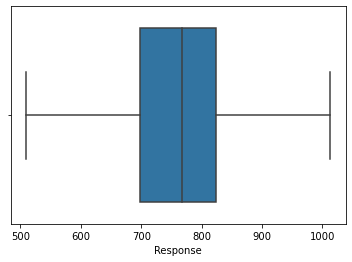

In [185]:
sns.boxplot(Data3['Response']);


In [227]:
Data3_alloy1 = Data3[Data3['Alloy']==1]
Data3_alloy1.head(3)

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813.0
1,1,1,1,1600,792.0
2,1,1,1,1700,792.0


In [228]:
Data3_alloy1.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,45.0,1600.000000,82.572282,1500.0,1500.0,1600.0,1700.0,1700.0
Response,45.0,717.577778,94.577647,509.0,681.0,743.0,782.0,882.0


In [189]:
Data3_alloy2=Data3[Data3['Alloy']==2]
Data3_alloy2.head(3)

,Dentist,Method,Alloy,Temp,Response
3,1,1,2,1500,907.0
4,1,1,2,1600,792.0
5,1,1,2,1700,835.0


In [190]:
Data3_alloy2.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,45.0,1600.000000,82.572282,1500.0,1500.0,1600.0,1700.0,1700.0
Response,45.0,784.088889,126.592191,509.0,715.0,824.0,858.0,1013.0


In [191]:
#Alloy1 
formula='Response ~ C(Dentist)'
model = ols(formula,Data3_alloy1).fit()
aov_table1=anova_lm(model)
print(aov_table1)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0   66319.422222  16579.855556  2.026521  0.109066
Residual    40.0  327257.555556   8181.438889       NaN       NaN


In [192]:
#Alloy2
formula='Response ~ C(Dentist)+C(Alloy)'
model = ols(formula, Data3_alloy2).fit()
aov_table2=anova_lm(model)
print(aov_table2)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0   20704.977778   5176.244444  0.302518  0.874547
C(Alloy)     1.0   11730.013889  11730.013889  0.685544  0.412597
Residual    40.0  684420.666667  17110.516667       NaN       NaN


In [193]:
#7.2
alloy1 = Data3[Data3['Alloy']==1]['Response']
alloy2 = Data3[Data3['Alloy']==2]['Response']

In [194]:
print(stats.levene(alloy1,alloy2)) #LeveneTest

LeveneResult(statistic=2.02655886945465, pvalue=0.15810620474519305)


In [195]:
#shapiro test
print(stats.shapiro([alloy1]))
print(stats.shapiro([alloy2]))

ShapiroResult(statistic=0.8991953134536743, pvalue=0.000894434517249465)
ShapiroResult(statistic=0.927866518497467, pvalue=0.007890536449849606)


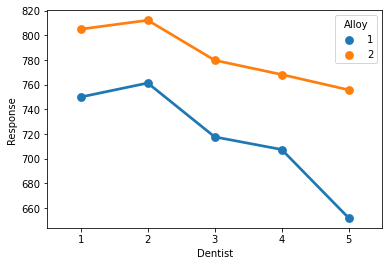

In [196]:
sns.pointplot(x='Dentist', y='Response', data=Data3, hue='Alloy', ci=None);

In [197]:
#alloy1
formula='Response ~ C(Method)'
model = ols(formula,Data3_alloy1).fit()
aov_table1=anova_lm(model)
print(aov_table1)


             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0   83943.644444  41971.822222  5.693239  0.006489
Residual   42.0  309633.333333   7372.222222       NaN       NaN


C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


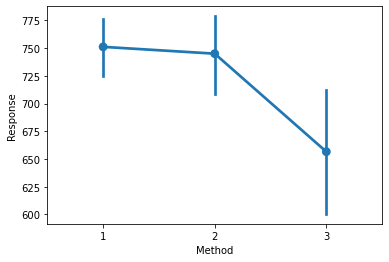

In [198]:
sns.pointplot(Data3_alloy1['Method'],Data3_alloy1['Response']);

In [199]:
#alloy_2
formula='Response ~ C(Method)'
model = ols(formula,Data3_alloy2).fit()
aov_table1=anova_lm(model)
print(aov_table1)


             df         sum_sq        mean_sq          F        PR(>F)
C(Method)   2.0  344333.644444  172166.822222  20.042037  7.741020e-07
Residual   42.0  360792.000000    8590.285714        NaN           NaN


C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


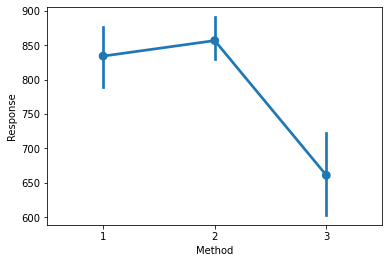

In [200]:
sns.pointplot(Data3_alloy2['Method'],Data3_alloy2['Response']);

In [201]:
#alloy_1
formula='Response ~ C(Temp)'
model = ols(formula,Data3_alloy1).fit()
aov_table1=anova_lm(model)
print(aov_table1)

            df         sum_sq      mean_sq         F    PR(>F)
C(Temp)    2.0    4603.511111  2301.755556  0.248536  0.781081
Residual  42.0  388973.466667  9261.273016       NaN       NaN


C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


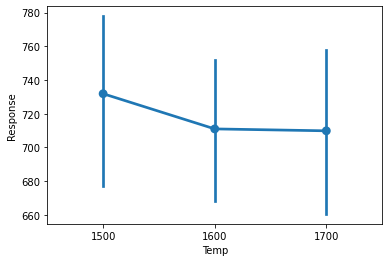

In [202]:
sns.pointplot(Data3_alloy1['Temp'], Data3_alloy1['Response']);

In [203]:
#alloy_2
formula='Response ~ C(Temp)'
model = ols(formula,Data3_alloy2).fit()
aov_table1=anova_lm(model)
print(aov_table1)


            df         sum_sq       mean_sq         F    PR(>F)
C(Temp)    2.0   46205.911111  23102.955556  1.472598  0.240927
Residual  42.0  658919.733333  15688.565079       NaN       NaN


C:\Users\anamk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


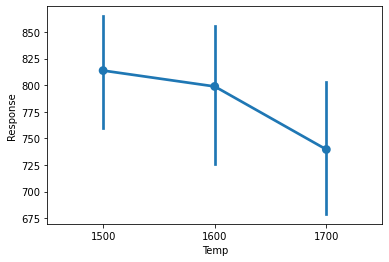

In [204]:
sns.pointplot(Data3_alloy2['Temp'], Data3_alloy2['Response']);

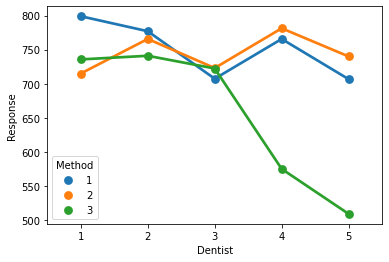

In [205]:
sns.pointplot(x='Dentist', y='Response', data=Data3_alloy1, hue='Method',ci=None);

In [206]:
#alloy_1
formula='Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,Data3_alloy1).fit()
aov_table1=anova_lm(model)
print(aov_table1)

                        df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)             4.0   66319.422222  16579.855556  3.539108  0.017620
C(Method)              2.0   83943.644444  41971.822222  8.959234  0.000890
C(Dentist):C(Method)   8.0  102771.244444  12846.405556  2.742172  0.021263
Residual              30.0  140542.666667   4684.755556       NaN       NaN


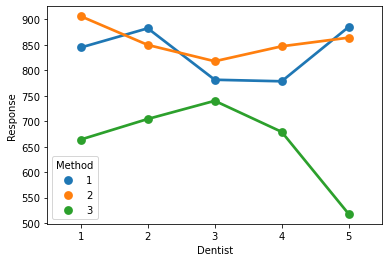

In [207]:
sns.pointplot(x='Dentist', y='Response', data=Data3_alloy2, hue='Method',ci=None);

In [208]:
#alloy_2
formula='Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,Data3_alloy2).fit()
aov_table1=anova_lm(model)
print(aov_table1)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   20704.977778    5176.244444   0.678500  0.612236
C(Method)              2.0  344333.644444  172166.822222  22.567548  0.000001
C(Dentist):C(Method)   8.0  111218.355556   13902.294444   1.822306  0.111831
Residual              30.0  228868.666667    7628.955556        NaN       NaN


In [209]:
#alloy_1
formula='Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,Data3_alloy1).fit()
aov_table1=anova_lm(model)
print(aov_table1)

                        df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)             4.0   66319.422222  16579.855556  3.539108  0.017620
C(Method)              2.0   83943.644444  41971.822222  8.959234  0.000890
C(Dentist):C(Method)   8.0  102771.244444  12846.405556  2.742172  0.021263
Residual              30.0  140542.666667   4684.755556       NaN       NaN


In [210]:
#alloy_2
formula='Response ~ C(Dentist) + C(Method) + C(Dentist):C(Method)'
model = ols(formula,Data3_alloy2).fit()
aov_table1=anova_lm(model)
print(aov_table1)

                        df         sum_sq        mean_sq          F    PR(>F)
C(Dentist)             4.0   20704.977778    5176.244444   0.678500  0.612236
C(Method)              2.0  344333.644444  172166.822222  22.567548  0.000001
C(Dentist):C(Method)   8.0  111218.355556   13902.294444   1.822306  0.111831
Residual              30.0  228868.666667    7628.955556        NaN       NaN
